# Home-Depot-Semantic-Segmentation
Team 1 Members:
- [Jose Mojica Perez](https://github.com/J-Mojica)
- [Mehakpreet Kaur](https://github.com/Mehakpreet21)

## Milestone 1

### CVAT Installation Instructions Followed

- Install WSL2 (Windows subsystem for Linux) refer to [this official guide][WSL2-Guide] 
WSL2 requires Windows 10, version 2004 or higher. Note: You may not have to install a Linux distribution unless needed.

- Download and install [Docker Desktop for Windows][Docker-Download] Double-click `Docker for Windows Installer` 
to run the installer. Note: Check that you are specifically using WSL2 backend for Docker.

- Download and install [Git for Windows][Git-Download]. When installing the package please keep all options 
by default. More information about the package can be found here.

- Download and install [Google Chrome][Chrome-Download]. It is the only browser which is supported by CVAT.

- Go to windows menu, find Git Bash application and run it. You should see a terminal window.

- Clone CVAT source code from the GitHub repository.

The following command will clone the latest develop branch:

```
git clone https://github.com/opencv/cvat
cd cvat
```

Run docker containers. It will take some time to download the latest CVAT release and other 
required images like postgres, redis, etc. from DockerHub and create containers.

```
docker-compose up -d
```

You can register a user but by default it will not have rights even to view list of tasks. 
Thus you should create a superuser. A superuser can use an admin panel to assign correct 
groups to other users. Please use the command below:

```
winpty docker exec -it cvat_server bash -ic 'python3 ~/manage.py createsuperuser'
```

Choose a username and a password for your admin account. For more information please read Django documentation.

Open the installed Google Chrome browser and go to localhost:8080.

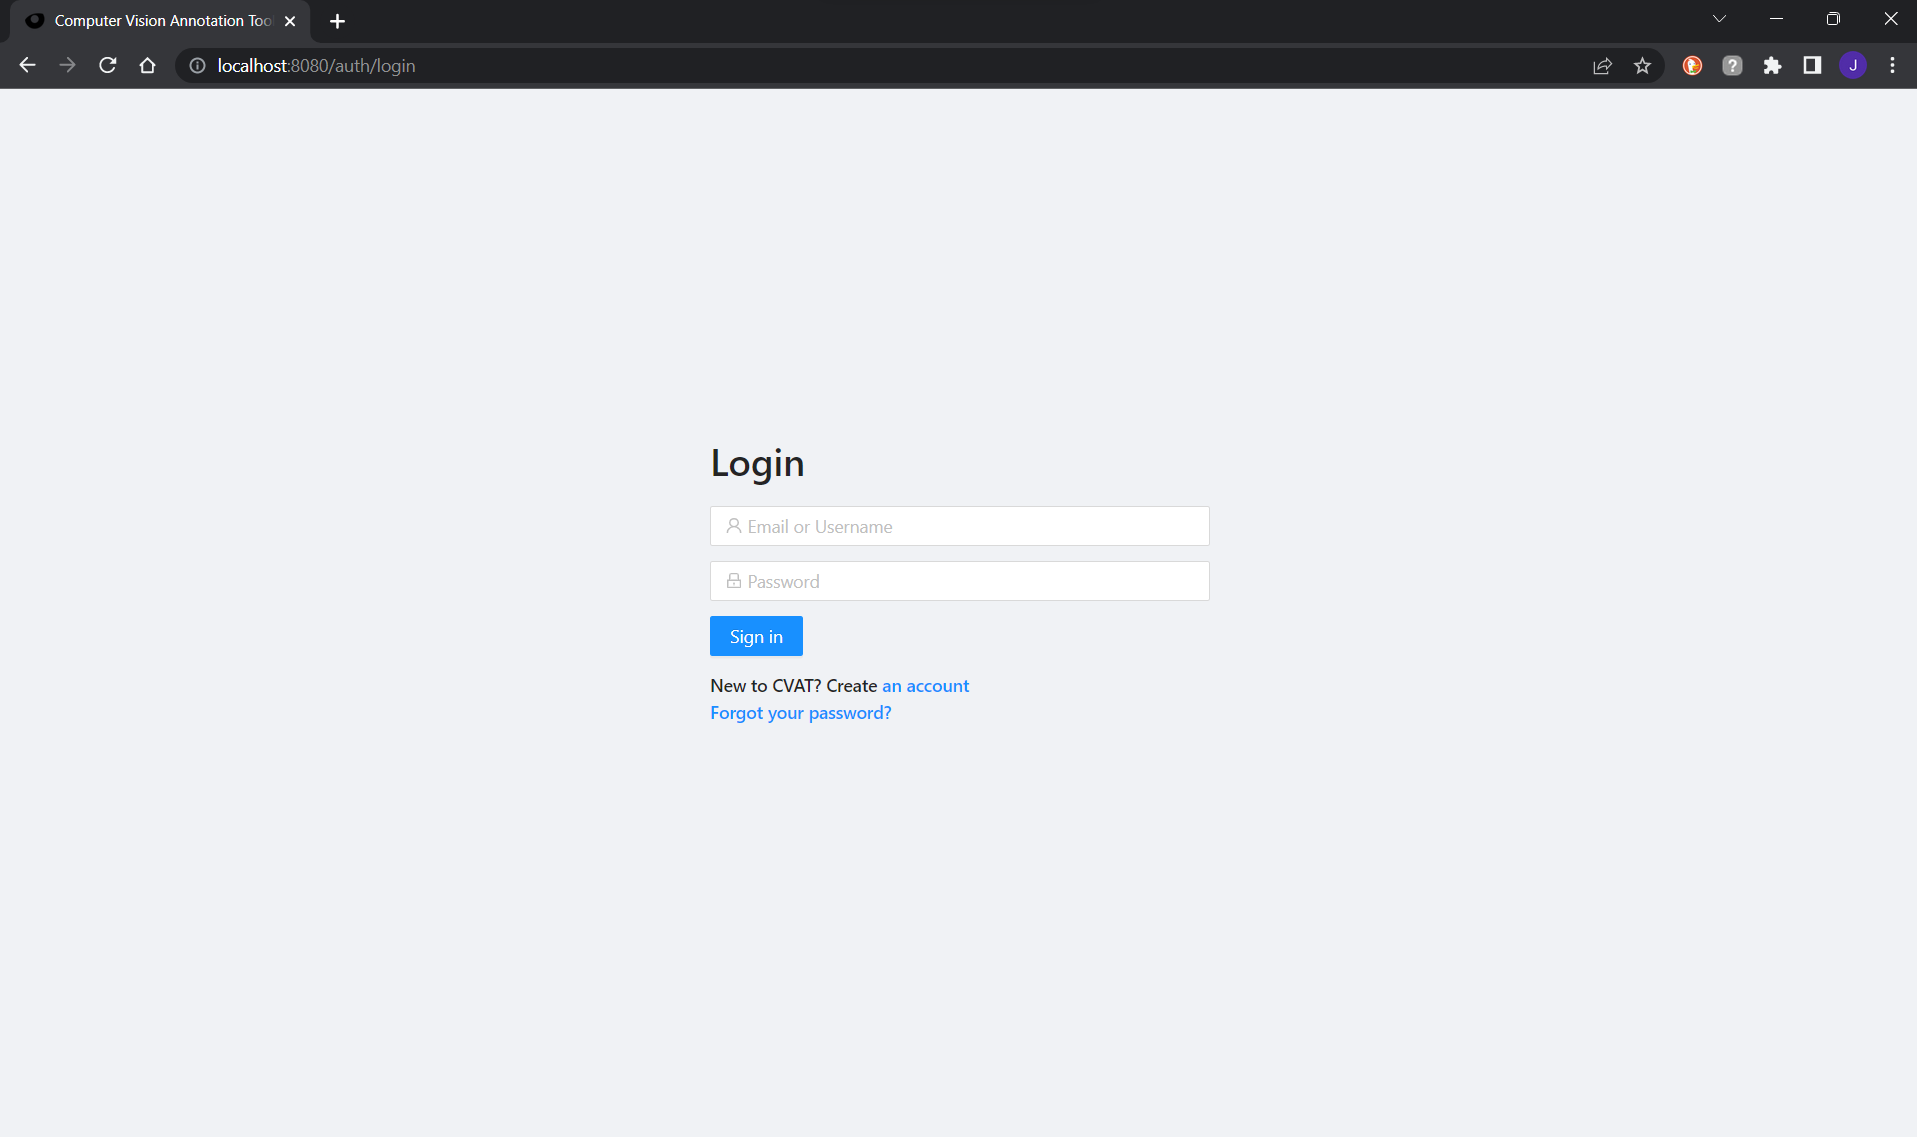

## Milestone 2

### Image Scapping using Google Custom Search API
#### Steps used (mentioned in data-acquisition.md as well): 
- Create a new project in [Google API cloud console](https://console.cloud.google.com/apis/dashboard)

- In this new project, enable the Custom Search API.

- Go to the credentials tab on the dashboard and acquire an API key for the Custom Search API

- Go to the [Programmable Search Engine Control Panel](https://programmablesearchengine.google.com/controlpanel/all) and add a new 
custom search engine, making sure to enable image search. Then get the Search Engine's ID in it's overview page after adding it.
  
- Create the functions for a [web scraper](image_scraper.py) which uses the Google API Python Client to access a Custom Search Engine resource
 to obtain the URLs of images and downloads them.

- Created a [driver program](scrape.py) for the [web scraper](image_scraper.py) functions to get the URLs of 200 images
and download them. We acquired double of what's necessary in case some of the URLs do not work or the images are repeated 
instances of others already in the set. Manual clean up will be done at a later stage and the image set will be restricted 
to only 100 images per category. 

- Saved the URLs into a file called "urls.txt" for each category and downloaded the images from those urls. Each
category has its own separate directory and are saved with the name of its respective category followed by a sequential number
for easy identification.

Below is a screenshot showing the scraped images for a blender, as an example of the outputs that can be found in Home-Depot-Semantic-Segmentation/data/data-raw/blender/


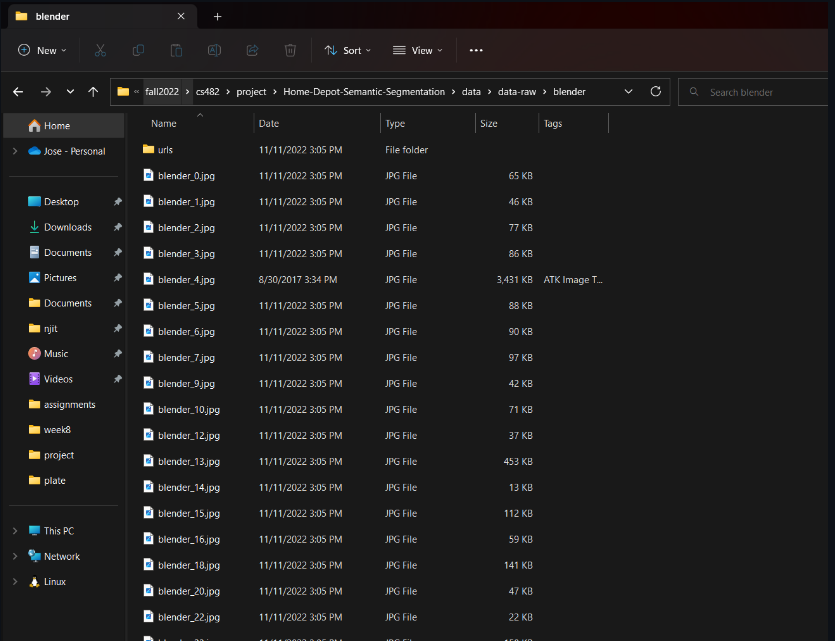


## Milestone 3

### Annotated Data
Our annotated data can be found [here.](https://github.com/J-Mojica/Home-Depot-Semantic-Segmentation/tree/annotation/data/)

### DEXTR and How it works

#### Brief Definition 
[Deep Extreme Cut (DEXTR)](https://cvlsegmentation.github.io/dextr/) is a computer vision deep learning model for semi-automatic object segmentation. The model is able to obtain an object segmentation from at least four of its boundary (“extreme”) points: left-most, right-most, top and bottom pixels (Maninis et al., 2018).

#### How it works
This model builds on the work of Papadopoulous et al.(2017) in which they use this same approach for generating bounding boxes around an object. In a nutshell, these four points are used to generate a heatmap around the object which is concatenated with the RGB channels of the input image, creating a four-dimensional input for a Convolutional Neural Network (CNN). These points are also used to generate a bounding box around the object of interest, then this bounding box is relaxed by several pixels to include some context around the object. And finally the image is cropped to just include this region of interest, which includes the object, some context plus its extreme points, as the input for the CNN.  The output of this CNN is “a probability map representing whether a pixel belongs to the object that we want to segment or not. The CNN is trained to minimize the standard cross entropy loss, which takes into account that different classes occur with different frequency in a dataset” (Maninis et al., 2018). In this way, the model is able to obtain fairly accurate object segmentation which can be further refined by providing more extreme points.

#### Applications

DEXTR can be used to obtain dense annotations to train supervised techniques and we have used this application in this milestone for our data of kitchen objects (Dishwasher, blender, toasters etc). As explained by Maninis et al., “in this framework, instead of detailed polygon labels, the workload of the annotator is reduced to only providing the extreme points of an object” (2018), greatly reducing the amount of time needed to to label a data set. Algorithms that are trained using the annotations that are produced by DEXTR perform just as well as those that are trained using the ground truth ones. Training with DEXTR is much more efficient than training from the ground truth for a given target quality when the cost of obtaining such annotations is taken into account. (Maninis et al., 2018)



#### Experimental observations

Following are some of the experimental observations obtained by Maninis et al. available in their 2018 publication:

Different experiments done based on processing full or cropped images also showed that focusing on the objects of interest instead of processing the whole image increased the performance by 7.9% since there are less additional variations in the input in that case. 

Another such experiment on DEXTR focused on the variations in the output between extreme points supplied by humans and those that [Deep Extreme Cut: From Extreme Points to Object Segmentation](https://arxiv.org/pdf/1711.09081.pdf) modeled, to see if the conclusions we make from the simulations would still hold true in a real-world application with human annotators. 
Similarly, many such variations of possibilities have been considered in the use of DEXTR, a CNN architecture that converts extreme clicking annotations into precise object masks for semi-automatic segmentation, in order to absolve the possible parameters that make it a better model. 

#### Citations
D. P. Papadopoulos, J. R. Uijlings, F. Keller, and V. Ferrari. Extreme clicking for efficient object annotation. In ICCV, 2017

Maninis, K.-K. et al. (2018) “Deep Extreme Cut: From extreme points to object segmentation,” 2018 IEEE/CVF Conference on Computer Vision and Pattern Recognition [Preprint]. Available at: https://doi.org/10.1109/cvpr.2018.00071.






## Milestone 4
To perform the segmentation, we used the [Detectron2](https://github.com/facebookresearch/detectron2)
We used a model pretrained on the MS COCO dataset implemented within the Detectron2 framework.
The model used for the segmentation is a model similar to This is similar to the setting used in the
[Mask R-CNN paper](https://doi.org/10.48550/arXiv.1703.06870), Appendix A, with some modifications

The training and segmentation was done using google colab with a GPU runtime.

To select our hyperparamenters (mainly the number of iterations), the model
was first trained on 1000 iterations, and then the loss curves evaluated
using tensorboard. On this evaluation we determined that the model
performed best with about 600 iterations. Then the model was reinitialized
and trained for this amount of iterations.

The process can be seen in the [segmentation notebook](https://github.com/J-Mojica/Home-Depot-Semantic-Segmentation/tree/segmentation/segmentation.ipynb)

In the [segmentation directory](https://github.com/J-Mojica/Home-Depot-Semantic-Segmentation/tree/segmentation/) one can find the trained model and our attempt at segmenting a 30 second clip of a Home Depot video.
